# COGS 108 - Sentiment and Economic Relation

# Permissions

Place an `X` in the appropriate bracket below to specify if you would like your group's project to be made available to the public. (Note that student names will be included (but PIDs will be scraped from any groups who include their PIDs).

* [ X ] YES - make available
* [  ] NO - keep private

# Names

- Santiago Cardenas Rey
- Jiaying Chen
- Gaurav Nair
- Esther Tae
- Qirui Zheng

# Abstract

In this project, we wanted to see how people’s opinions about products on Epinion, a consumer review website that has since shut down, changed over time and whether those opinions were influenced by big-picture economic factors like the US Real GDP, as well as specific product details like pricing. We used a pre-trained BERT sentiment analysis model to score user reviews, and then paired those scores with quarterly GDP data after converting timestamps to match. After cleaning the data, we explored patterns using histograms and line plots to see if consumer sentiment lined up with economic trends. We noticed that sentiment dropped around the 2008 financial crisis, and picked up again once the economy recovered which supports our original idea. We then ran a permutation test to check if the differences in sentiment between high and low GDP periods were actually meaningful. The test gave us a p-value of 0.014, which means we could confidently reject the idea that it was random and say that sentiment is likely influenced by the economy, but the strength of that influence is weak. Overall, our results show that people’s reviews and ratings aren’t just about the product: they also somewhat reflect how things are going economically at the time.

# Research Question

How does the preference of the users on Epinion change over time on the products? Are the consumer's sentiments related by the US Real GDP (Quarter over Quarter) and product characteristics? Sentiment will be measured using a pretrained and later fine-tuned BERT model (Bidirectional Encoder Representations from Transformers, https://huggingface.co/nlptown/bert-base-multilingual-uncased-sentiment). To measure possible relationships with sentiment and US Real GDP (Quarter over Quarter), we will conduct basic time-series analysis and a permutation test to see if there is an association between the two. As for the product characteristics we will mainly focus on the price and the sentiment scores by doing a One-way ANOVA.



## Background and Prior Work

Amidst a society that spends a significant amount of their life online, everyone has scoured the internet for reviews of a product at least once. Products of furniture, makeup, skincare, and technology are just a few. And oftentimes, reading the descriptions of them mean almost nothing– they feel too robotic or professional for people to feel truthful, especially since the persons who wrote those descriptions are often aiming for profit rather than truth. As a result, user rating and comments are often the most important part of a product page for consumers. The situation of the economy at certain points in time may can also be a factor that affects sentiments from the comments. Discovering if there is a correlation can reveal more about how people rate and review products and exactly what they pay attention to.

Some prior work has already been done regarding general user comments and ratings. One study focused on Amazon, a website known for being a reliable online shopping source. Focusing on emotionality and product star rating, the paper tested the relationship between ratings and review length and text sentiments, although they also took into account the type of product featured.<a name="cite_ref-1"></a>[<sup>1</sup>](#cite_note-1) The results revealed negative sentiments were more influential to the star ratings compared to positive sentiments of the same magnitude, as negative experiences were recollected more readily and given more weight<a name="cite_ref-1"></a>[<sup>1</sup>](#cite_note-1), which is a revelation we will be looking out for in our project. Another study focused on the sentiment and the rating of users, as well as the adjectives used when they correlated. This was done to help future researchers find out if it could make customers more prone to write reviews if they let the customer choose between adjectives rather than write an entire review.<a name="cite_ref-2"></a>[<sup>2</sup>](#cite_note-2) This study concluded a moderate correlation between user rating and reviews, which indicated a method to simplify online reviews and customers do not necessarily motivate the rating in their comment and many times actually write out objective lists (i.e. pros and cons).<a name="cite_ref-2"></a>[<sup>2</sup>](#cite_note-2) It also revealed how longer comments tended to have a slightly stronger correlation<a name="cite_ref-2"></a>[<sup>2</sup>](#cite_note-2), which was similar to the first study where they found the product star ratings of a review were negatively related to the length of a review.<a name="cite_ref-1"></a>[<sup>1</sup>](#cite_note-1) Both studies also discussed the existence of negativity bias, as the longer comments tended to be negative instead of positive due to negative experiences being recalled more vividly due to the weight of them on the user. These are all explorations we will be taking into consideration for the project in regards to user comments and ratings. Although these works do not discuss the effect of time, we will expand upon them by studying it in our project.

1. <a name="cite_note-1"></a> [^](#cite_ref-1) Ramachandran, R., Sudhir, S., & Unnithan, A. B. (2021). Exploring the relationship between emotionality and product star ratings in online reviews. IIMB Management Review. https://doi.org/10.1016/j.iimb.2021.12.002  
2. <a name="cite_note-2"></a> [^](#cite_ref-2) Sandström, E., & Josefsson, F. (n.d.). Exploring the Correlation Between Ratings, Adjectives and Sentiment on Customer Reviews. Retrieved February 7, 2025, from https://www.diva-portal.org/smash/get/diva2:1691596/FULLTEXT01.pdf 


# Hypothesis


We predict that as time passes and prices adjust in response to economic factors, user sentiment (reflected in ratings and comments) will be closely tied to whether consumers perceive the price paid as fair. If users believe the cost aligns with the value received, they will respond with higher ratings and more positive sentiment; if not, their sentiment and ratings will be more negative.

We also predict that the sentiment of the comments of the users are impacted by the Real US GDP (Quarter over Quarter). As the Real GDP Growth Rate becomes positive, we can see an improvement in consumer sentiment and vice versa. We justify this because an improvement in the Real US GDP, it indicates more production and higher production of value which could indicate higher income and product quality, both of which impact consumer sentiment, that is already adjusted to inflation. We will be using the Real GDP Growth as a measurement tool to measure inflation and economic impacts on consumer behavior.

# Data

## Data overview
- The ideal dataset to answer our research question would be a dataset with the time of user comments, costs of the items, and rating from users. The ideal number of observations would be at least ten thousand entries in order to have a proper representation to study. The variables would be: the star rating, time (used as time series), and description to draw sentiment generalizations. The data would be collected from the website data itself, and will be stored and organized in a CSV dataframe. 
- We are also using the real GDP data of the US as a possible factor that can influence the user sentiments to test our hypothesis about the correlation between user sentiment and economic factors, since we hypothesized that the Real GDP is positively correlated with consumer sentiment.
 
- Dataset #1
  - Dataset Name: `epinion`
  - Link to the dataset: [Social Recommendation Data-Epinion](https://cseweb.ucsd.edu/~jmcauley/datasets.html#social_data)
  - Number of observations: **200853** rows
  - Number of variables: **6** 
  
- Dataset #2 (if you have more than one!)
  - Dataset Name: `real_gdp`
  - Link to the dataset: [Real Gross Domestic Product (A191RL1Q225SBEA)](https://fred.stlouisfed.org/series/A191RL1Q225SBEA)
  - Number of observations: **311** rows
  - Number of variables: **2**

### Epinion dataset 
| Variable  | Data Type | Description |
| -------- | ------- | ------ |
| `item`   | `string`| Specific item entry.  |
| `user` | `string`| The epinions username that bought the item. |
| `paid`  | `float64`| The amount the user paid. |
| `time` | `float64`| The timestamp that the user published their rating for the item, in [unix timestamp](https://en.wikipedia.org/wiki/Unix_time) format. |
| `stars`  | `float`| The star rating user gave on the item. |
| `words` |  `string`| User comments on the item. |

### GDP dataset
- Real GDP measures the total value of all goods and services produced in the country, adjusted for inflation. It is typically reported on a seasonally-adjusted annual rate (SAAR) basis and in chained 2017 dollars to reflect real economic growth.
The data is published quarterly by the BEA and widely used for economic analysis.
- GDP is measured in the currency of the country in question. 

| Variable  | Data Type | Description |
| -------- | ------- | ------ |
| `Observation-date`   | `string`| The date that the observation is recorded. This column has been renamed to `Quarter` after data cleaning, since observations are done quarterly.  |
| `A191RL1Q225SBEA` | `string`| The change in GDP of the specified quarter. A negative value implies a contraction in economy, while a positive value implies growth compared to previous quarter. This column has been renamed to `Real_GDP` after data cleaning.|


### How we intend to use them
We will utilize various methods such as linear regressions or logarithmic regression to identify possible correlations between the change in GDP and user sentiment.

# Set up and imports

In [1]:
# run !pip install transformers 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import transformers
from transformers import pipeline
import statsmodels.api as sm

None of PyTorch, TensorFlow >= 2.0, or Flax have been found. Models won't be available and only tokenizers, configuration and file/data utilities can be used.
None of PyTorch, TensorFlow >= 2.0, or Flax have been found. Models won't be available and only tokenizers, configuration and file/data utilities can be used.


## Epinion Dataset

In [2]:
epinion = pd.read_csv('epinion.csv')
epinion.head()


,item,user,paid,time,stars,words
0,Minolta_QMS_PagePro_1250E_Printers,fgb59h,260.0,1.027296e+09,4.0,i got this printer from minolta as a warranty ...
1,Sony_VAIO_PCG_K45_P4_538_3_2GHz_1MB_L2_533MHz_...,bucho_ky,1800.0,1.201306e+09,2.0,although i love my vaio especially the gorgeou...
2,Sony_VAIO_PCG_K45_P4_538_3_2GHz_1MB_L2_533MHz_...,redp944,1000.0,1.118016e+09,4.0,this is my first laptop and i bought it about ...
3,pr-Durabrand_CD-85_Personal_CD_Player,spongebag7,20.0,1.149293e+09,4.0,just recently my sony dej001 walkman died on m...
4,pr-Sony_KV_36FS12__Standard_Televisions,pyros7,1199.0,1.012262e+09,5.0,well when i graduated from college it didnt ta...


### Data cleaning

In [3]:
# Fill all NAN values in words to avoid errors  
epinion['words'] = epinion['words'].fillna("").astype(str)

### Data processing: Sentimental analysis

In [ ]:
# Load a pre-trained Hugging Face sentiment analysis pipeline
sentiment_model = pipeline("sentiment-analysis", model="nlptown/bert-base-multilingual-uncased-sentiment", device=6)

# Define the classification functionI
def classify_sentiment(text):
    if not text.strip():  # Handle empty strings
        return "neutral"  # Or any default label
    result = sentiment_model(text[:512])  # Truncate to 512 tokens
    return result[0]['label']  # Extract the sentiment label

# Apply the function to classify all reviews
epinion['sentiment'] = epinion['words'].apply(classify_sentiment)

# Display the results
print(epinion[['words', 'sentiment']].head())

epinion['sentiment'] = epinion['sentiment'].apply(lambda x: int(x[0]) if x != 'neutral' else 2.5)

epinion.to_csv('data_with_sentiment.csv', index=False)
epinion.head()

The code above uses a sentimental analysis model to find the sentiment of the comments of the users. The code takes significant amount of time and requires GPU to run, thus we will import the `data_with_sentiment.csv` output and directly use it here. The actual ran code is attached in `qirui_sentiment_bert.ipynb`.

In [4]:
epinion = pd.read_csv('data_with_sentiment.csv')
epinion.head()

,item,user,paid,time,stars,words,sentiment
0,Minolta_QMS_PagePro_1250E_Printers,fgb59h,260.0,1.027296e+09,4.0,i got this printer from minolta as a warranty ...,3.0
1,Sony_VAIO_PCG_K45_P4_538_3_2GHz_1MB_L2_533MHz_...,bucho_ky,1800.0,1.201306e+09,2.0,although i love my vaio especially the gorgeou...,3.0
2,Sony_VAIO_PCG_K45_P4_538_3_2GHz_1MB_L2_533MHz_...,redp944,1000.0,1.118016e+09,4.0,this is my first laptop and i bought it about ...,5.0
3,pr-Durabrand_CD-85_Personal_CD_Player,spongebag7,20.0,1.149293e+09,4.0,just recently my sony dej001 walkman died on m...,2.0
4,pr-Sony_KV_36FS12__Standard_Televisions,pyros7,1199.0,1.012262e+09,5.0,well when i graduated from college it didnt ta...,3.0


In [5]:
epinion.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200853 entries, 0 to 200852
Data columns (total 7 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   item       200853 non-null  object 
 1   user       200852 non-null  object 
 2   paid       189148 non-null  float64
 3   time       189083 non-null  float64
 4   stars      189083 non-null  float64
 5   words      184106 non-null  object 
 6   sentiment  200853 non-null  float64
dtypes: float64(4), object(3)
memory usage: 10.7+ MB


In [6]:
# Drop all unecessary columsn and drop all entries with null values. 
epinion = epinion[['item', 'paid', 'time', 'stars', 'sentiment']].dropna()

In [7]:
epinion.shape[0]/200853
# 94% of the data is still intact. We are good to go! 

0.9413999293015289

In [8]:
#visualize date time to see the date makes sense 
epinion['time'] = pd.to_datetime(epinion['time'], unit='s')
epinion['time'].describe()

count                           189083
mean     2005-08-28 22:34:41.790536320
min                2001-01-17 00:00:00
25%                2003-04-09 00:00:00
50%                2005-06-16 00:00:00
75%                2007-09-18 00:00:00
max                2013-11-15 00:00:00
Name: time, dtype: object

In [9]:
epinion['date'] = epinion['time'].dt.to_period('Q').dt.start_time
epinion = epinion.drop(columns=['time'])
epinion.head()

,item,paid,stars,sentiment,date
0,Minolta_QMS_PagePro_1250E_Printers,260.0,4.0,3.0,2002-07-01
1,Sony_VAIO_PCG_K45_P4_538_3_2GHz_1MB_L2_533MHz_...,1800.0,2.0,3.0,2008-01-01
2,Sony_VAIO_PCG_K45_P4_538_3_2GHz_1MB_L2_533MHz_...,1000.0,4.0,5.0,2005-04-01
3,pr-Durabrand_CD-85_Personal_CD_Player,20.0,4.0,2.0,2006-04-01
4,pr-Sony_KV_36FS12__Standard_Televisions,1199.0,5.0,3.0,2002-01-01


<Axes: xlabel='sentiment'>

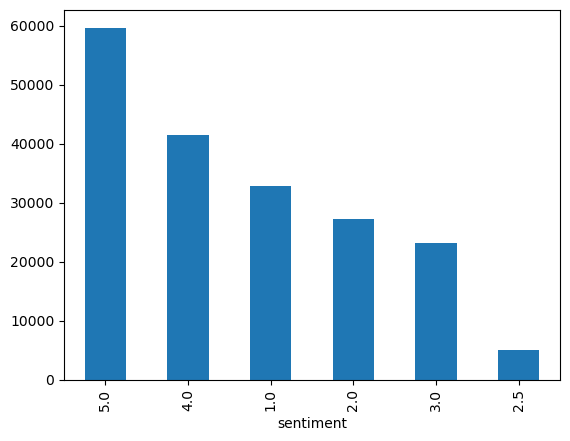

In [10]:
epinion['sentiment'].value_counts().plot(kind='bar')

## Real GDP Dataset

In [11]:
real_gdp =  pd.read_csv('A191RL1Q225SBEA.csv')
real_gdp = real_gdp.rename(columns={'observation_date': 'Quarter', 'A191RL1Q225SBEA': 'Real_GDP'})
real_gdp

,Quarter,Real_GDP
0,1947-04-01,-1.0
1,1947-07-01,-0.8
2,1947-10-01,6.4
3,1948-01-01,6.2
4,1948-04-01,6.8
...,...,...
306,2023-10-01,3.2
307,2024-01-01,1.6
308,2024-04-01,3.0
309,2024-07-01,3.1


In [12]:
real_gdp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 311 entries, 0 to 310
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Quarter   311 non-null    object 
 1   Real_GDP  311 non-null    float64
dtypes: float64(1), object(1)
memory usage: 5.0+ KB


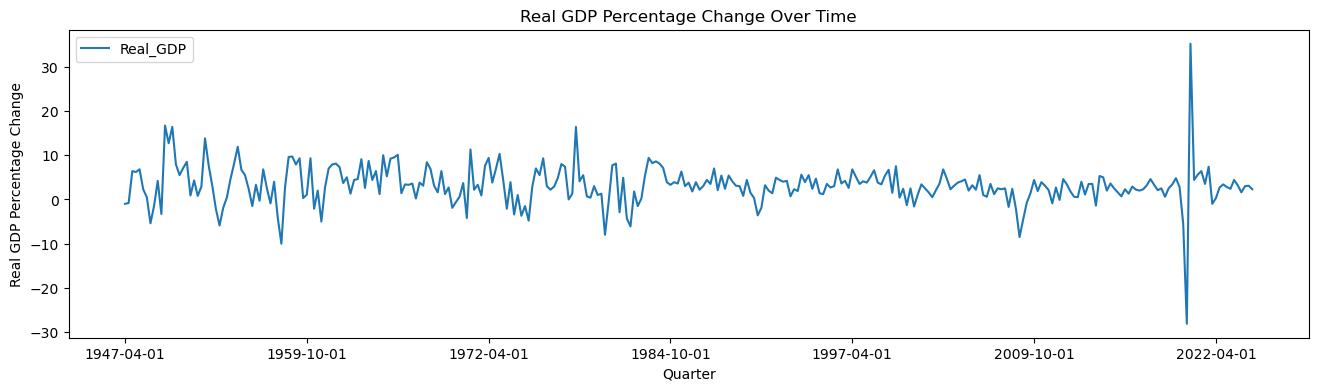

In [13]:
real_gdp.plot(kind='line', x='Quarter', y='Real_GDP', figsize=(16, 4))  # Set figsize here
plt.xlabel('Quarter')
plt.ylabel('Real GDP Percentage Change')
plt.title('Real GDP Percentage Change Over Time')
plt.show()

# Results

## Exploratory Data Analysis

For our EDA we will visualize the Real GDP Percentage Growth Quarter over Quarter in a histogram to see the distribution on US Real GDP Performance. This can help us identify what outcomes to expect (more weight on poor performance could hypothesize more negative sentiment). For our sentiment data, we used a histogram to visualize the distribution of sentiments, and we observe if it exhibits similar behavior to the Real GDP distribution.

We also created a lineplot to visualize average sentiment over time. Like the two graphs above, this helps us see if the behavior could be consistent with the time series of Real GDP.

### Section 1 of EDA - Histograms (Distribution Visualization)

Below are the histograms created for `real_gdp` and `epinions`. This helps us infer to a degree if Real GDP performance has impact on consumer sentiment. Mind that we do need to take the time factor into account! That will be the next section. 

For the Real GDP histogram, we can observe the mean and median to be above zero (indicating long-term growth in the US economy). We can also observe the leptakurtic property this distribution has, indicating an inelastic behavior through time. In other words, the variance is small and robust to outliers. One can also glance at the sentiment histogram being somewhat uniform with a couple bins with nothing (these are missing by design). Taking this into consideration, we can hypothesize that there is potential elasticity from sentiment scores and changes in Real GDP (small change in Real GDP Percentage Change creating big changes in consumer sentiment). This could go very aligned with the economical phenomenon called "consumer propensity multiplier", which is the fractal reaction of consumer behavior off of economical envrionment change.

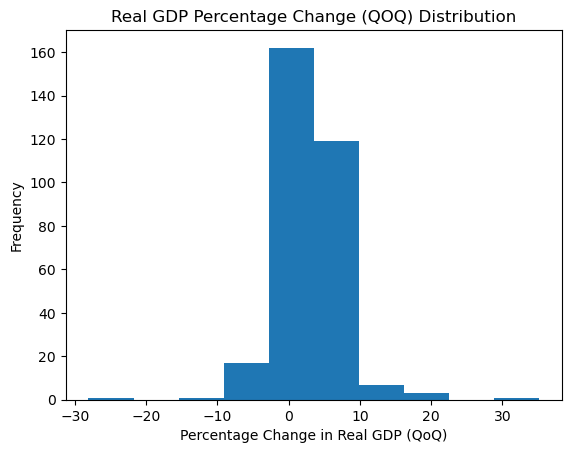

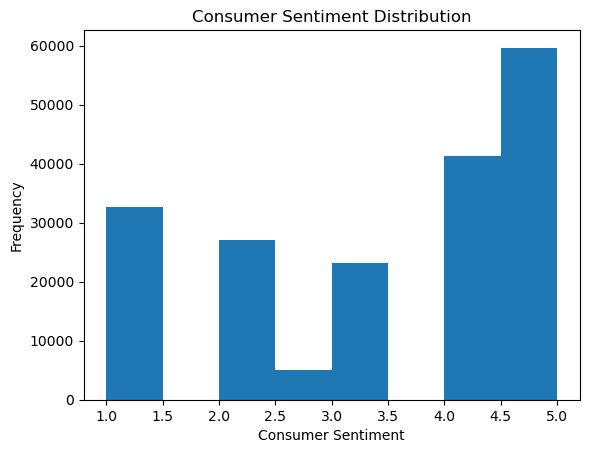

In [14]:
real_gdp['Real_GDP'].plot(kind='hist')
plt.xlabel('Percentage Change in Real GDP (QoQ)')
plt.ylabel('Frequency')
plt.title('Real GDP Percentage Change (QOQ) Distribution')
plt.show()
epinion['sentiment'].plot(kind='hist', bins=8)
plt.xlabel("Consumer Sentiment")
plt.ylabel('Frequency')
plt.title('Consumer Sentiment Distribution')
plt.show()

### Section 2 of EDA - Line Plot (Consumer Sentiment)

The purpose of this is to visualize the trend on consumer sentiment. This will go in hand with the distribution since we are now focusing on the similarities with time as our variable in observation.

Looking at the time plot of consumer sentiment over time (by taking the average sentiment by the given date), we can see a parabolic behavior where sentiment was decreasing since the start of the data set and reached the minima at around 2008-2009. Considering that the 2008 crisis occurred at this time and was one of the biggest recessions in US history, this evidence is very supportive of our hypothesis. After the crisis which was recovered in about 2011, the economy hit at a stable level. This can also be seen by our sentiment line plot below where it hit normal levels at around 2012.

In [15]:
avg_sentiment = epinion[['sentiment', 'date']].groupby('date').mean()

In [16]:
avg_sentiment.head()

,sentiment
date,
2001-01-01,3.637532
2001-04-01,3.575895
2001-07-01,3.574371
2001-10-01,3.553534
2002-01-01,3.524950


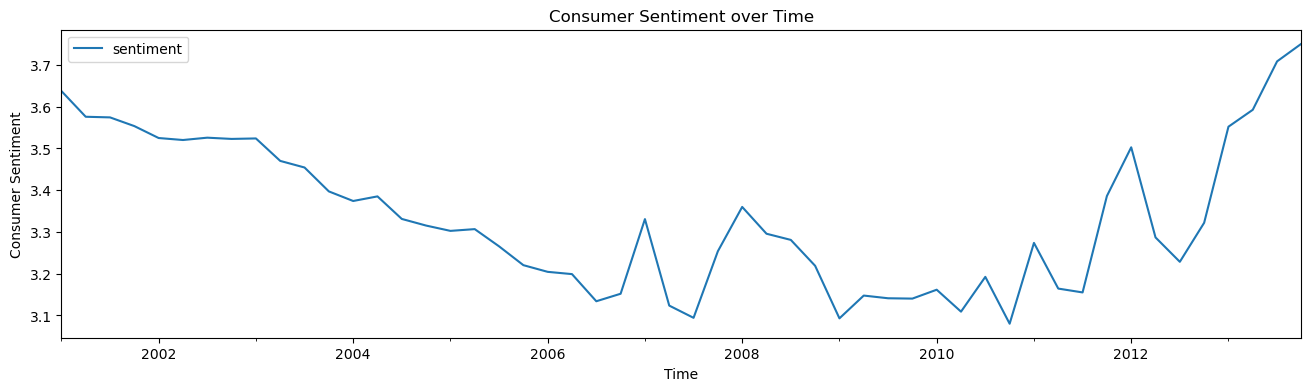

In [17]:
avg_sentiment.reset_index().plot(kind='line', x='date', y='sentiment', figsize=(16, 4))
plt.xlabel('Time')
plt.ylabel('Consumer Sentiment')
plt.title('Consumer Sentiment over Time')
plt.show()

# Exploring relationship between GDP and Consumer Sentiment 

In [18]:
epinion.info()

<class 'pandas.core.frame.DataFrame'>
Index: 189083 entries, 0 to 200852
Data columns (total 5 columns):
 #   Column     Non-Null Count   Dtype         
---  ------     --------------   -----         
 0   item       189083 non-null  object        
 1   paid       189083 non-null  float64       
 2   stars      189083 non-null  float64       
 3   sentiment  189083 non-null  float64       
 4   date       189083 non-null  datetime64[ns]
dtypes: datetime64[ns](1), float64(3), object(1)
memory usage: 8.7+ MB


# Permutation Testing

To find the relationship between real GDP and sentiments, we will conduct a permutation test. 

Null Hypothesis ($H_0$): There is no statistically significant difference in user sentiment (ratings and/or comments) between high GDP quarters and low GDP quarters. Any observed difference is due to random chance.

Alternative Hypothesis ($H_1$): There is a statistically significant difference in user sentiment between high GDP quarters and low GDP quarters. Higher GDP is associated with higher sentiment, and lower GDP is associated with lower sentiment.

We will set a confidence interval of 0.05. 

In [19]:
epinion.rename(columns={'date': 'Quarter'}, inplace=True)
epinion['Quarter'] = pd.to_datetime(epinion['Quarter'])
real_gdp['Quarter'] = pd.to_datetime(real_gdp['Quarter'])

### Step 1: Calculate the median GDP growth and create a binary label

In [30]:
gdp_median = real_gdp['Real_GDP'].median()
real_gdp['high_gdp'] = real_gdp['Real_GDP'] > gdp_median
print(gdp_median)

3.1


### Step 2: Merge the datasets

In [21]:
merged = pd.merge(epinion, real_gdp[['Quarter', 'high_gdp']], on='Quarter', how='inner')
merged.head()

,item,paid,stars,sentiment,Quarter,high_gdp
0,Minolta_QMS_PagePro_1250E_Printers,260.0,4.0,3.0,2002-07-01,False
1,Sony_VAIO_PCG_K45_P4_538_3_2GHz_1MB_L2_533MHz_...,1800.0,2.0,3.0,2008-01-01,False
2,Sony_VAIO_PCG_K45_P4_538_3_2GHz_1MB_L2_533MHz_...,1000.0,4.0,5.0,2005-04-01,False
3,pr-Durabrand_CD-85_Personal_CD_Player,20.0,4.0,2.0,2006-04-01,False
4,pr-Sony_KV_36FS12__Standard_Televisions,1199.0,5.0,3.0,2002-01-01,True


### Step 3: Compute observed TVD

In [22]:
sentiment_counts_high = merged[merged['high_gdp'] == True]['sentiment'].value_counts(normalize=True)
sentiment_counts_low = merged[merged['high_gdp'] == False]['sentiment'].value_counts(normalize=True)

# Ensure both distributions have the same categories
all_categories = set(sentiment_counts_high.index) | set(sentiment_counts_low.index)
sentiment_counts_high = sentiment_counts_high.reindex(all_categories, fill_value=0)
sentiment_counts_low = sentiment_counts_low.reindex(all_categories, fill_value=0)

obs_tvd = 0.5 * np.sum(np.abs(sentiment_counts_high - sentiment_counts_low))

print("Observed Total Variation Distance (TVD):", obs_tvd)

Observed Total Variation Distance (TVD): 0.008206897493378018


### Step 4: Permutation Test for TVD

In [23]:

n_permutations = 1000
tvd_diffs = []

for _ in range(n_permutations):
    shuffled = merged.copy()
    shuffled['shuffled_high_gdp'] = np.random.permutation(shuffled['high_gdp'])

    # Compute shuffled TVD
    sentiment_counts_high_shuffled = shuffled[shuffled['shuffled_high_gdp'] == True]['sentiment'].value_counts(normalize=True)
    sentiment_counts_low_shuffled = shuffled[shuffled['shuffled_high_gdp'] == False]['sentiment'].value_counts(normalize=True)

    sentiment_counts_high_shuffled = sentiment_counts_high_shuffled.reindex(all_categories, fill_value=0)
    sentiment_counts_low_shuffled = sentiment_counts_low_shuffled.reindex(all_categories, fill_value=0)

    shuffled_tvd = 0.5 * np.sum(np.abs(sentiment_counts_high_shuffled - sentiment_counts_low_shuffled))
    tvd_diffs.append(shuffled_tvd)

# Calculate p-value
p_value = np.mean(np.array(tvd_diffs) >= obs_tvd)
print("Permutation test p-value:", p_value)

Permutation test p-value: 0.014


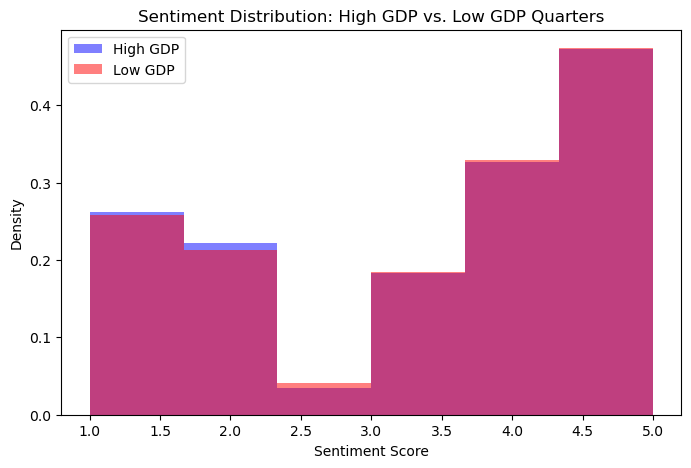

In [37]:
plt.figure(figsize=(8, 5))
# merged['sentiment'].plot(kind='hist', bins=6, alpha=0.5, color='blue', label='')

# Plot density histogram for high-GDP sentiment
merged[merged['high_gdp'] == True]['sentiment'].plot(kind='hist', bins=6, density=True, alpha=0.5, color='blue', label='High GDP')

# Plot density histogram for low-GDP sentiment on the same plot
merged[merged['high_gdp'] == False]['sentiment'].plot(kind='hist', bins=6, density=True, alpha=0.5, color='red', label='Low GDP')

# Labels and title
plt.xlabel('Sentiment Score')

plt.ylabel('Density')
plt.title('Sentiment Distribution: High GDP vs. Low GDP Quarters')
plt.legend()

# Show plot
plt.show()


We defined our confidence interval to be 0.05. With a p-value of 0.014, we have statistical significance in our test statistic. This means we can reject the null hypothesis, as the observed difference in user sentiment between high GDP and low GDP quarters is statistically significant and unlikely to have occurred by random chance. The permutation test further validates this result by comparing the observed statistic to a distribution of statistics generated by randomly permuting the data. In essence, there is evidence suggesting that user sentiment (ratings and/or comments) is influenced by Real US GDP, but the strength of this influence is weak.

# Ethics & Privacy

Our team consulted [Deon's Ethics Checklist](http://deon.drivendata.org/#data-science-ethics-checklist) as suggested by the proposal guide. Here are some questions we have looked into: 

- Are there any biases/privacy/terms of use issues with the data you proposed?

There may be privacy concerns with Personally Identifiable Information, since the data contains usernames which could potentially identify individuals. It is crucial to consider whether the data has been properly anonymized to prevent re-identification.


- Are there potential biases in your dataset(s), in terms of who it composes, and how it was collected, that may be problematic in terms of it allowing for equitable analysis? (For example, does your data exclude particular populations, or is it likely to reflect particular human biases in a way that could be a problem?)

The dataset may have selection bias where certain user demographics may be overrepresented, such as those who are more likely to leave reviews (e.g., dissatisfied customers AND very satisfied customers are more likely to leave reviews). There may also be a small amount of response bias, for the users may leave reviews due to personal experiences unrelated to the product itself. 


- How will you set out to detect these specific biases before, during, and after/when communicating your analysis?

Exploratory data analysis is a good way to detect the biases. When analyzing data, we can see the temporal trend and how extreme the ratings are to make inferences about why the users leave their reviews. In terms of how the data was collected, we know it is real, authentic data provided by the epinion website itself.  


- How will you handle issues you identified?

To handle the issue of anonymity, we will take away the username column when doing our analysis since it provides no useful information. To handle bias, we will check and see whether or not the ratings really are as extreme as we hypothesized it to be, and we can make inferences carefully and accordingly. We will make reasonable data visualizations to understand the data more, and we will use statistical methods to see if correlations exist in our data.

# Discussion and Conclusion
We present key findings on the relationship between user sentiment in Epinion product reviews, US Real GDP (Quarter over Quarter), and product characteristics. By integrating sentiment analysis with economic data, we identified patterns linking consumer sentiment to broader economic conditions.

1. Sentiment Analysis

We applied a fine-tuned BERT sentiment analysis model to classify review sentiments on a 0 to 5 scale. Sentiment scores tended to be more positive during high GDP quarters compared to economic downturns, suggesting that economic conditions may influence consumer sentiment.

2. Hypothesis Evaluation

Statistical analysis supported our hypothesis that Real GDP influences user sentiment. A hypothesis test yielded a p-value of 0.015 (confidence level = 0.05), confirming that sentiment differences between high and low GDP quarters were unlikely due to chance. Consumers were more likely to leave positive reviews during economic expansion, highlighting the role of macroeconomic conditions in shaping sentiment.

3. Limitations and Future Research

Since our sentiment model is robust, misclassifications can occur, especially for ambiguous reviews. Sentiment may also be influenced by economic factors beyond GDP, such as inflation and consumer confidence, which were not included in this study. Future research should incorporate these variables and employ advanced econometric models to capture nonlinear relationships.

4. Conclusion

Our findings provide statistical evidence of a relationship, albeit weak positive, between economic growth and consumer sentiment. While product characteristics also contribute to shaping sentiment, macroeconomic factors, such as GDP, play a significant role in influencing online reviews. Future studies should further explore other economic indicators and refine sentiment analysis techniques to enhance our understanding of consumer behavior in relation to broader economic trends.

# Team Contributions
Rebecca Chen:
- Established the team and facilitated collaboration by organizing team meetings and maintaining meeting documentation.
- Led the data cleaning and exploratory data analysis (EDA) processes, ensuring data quality and consistency.
- Authored the report sections related to data preprocessing and EDA.

Santiago Cardenas Rey:
- Conducted exploratory data analysis (EDA) and generated key visualizations to support data-driven insights.
- Collected and integrated the GDP dataset, providing an additional layer of analysis.

Esther Tae:
- Led the report writing process, authoring key sections such as Background and Prior Work, Hypothesis, and Methodology to provide a strong research foundation.
- Authored key sections such as Background and Prior Work, Hypothesis, and Methodology, synthesizing relevant literature and framing the research objectives.
- Structured the report to align with the data analysis workflow, making it more readable and cohesive.

Qirui Zheng:
- Preprocessed and cleaned textual data to improve sentiment classification accuracy and ensure meaningful insights.
- Developed the sentiment analysis component using Hugging Face’s pipeline crucial to sentimental analysis, leveraging the nlptown/bert-base-multilingual-uncased-sentiment model.

Gaurav Nair:
- Designed and implemented a permutation test to evaluate the statistical significance of findings.